## **ACTIVIDAD**

### **Importar bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

### **Cargar el dataset**

In [39]:
# Cargar el dataset de Blue Jays
blue_jays = pd.read_csv('blue_jays.csv')

### **Filtrar las columnas para el análisis bivariado**

In [40]:
# Filtrar las columnas a utilizar para el análisis bivariado
variables = ["bill_depth_mm", "bill_width_mm", "bill_length_mm", "head_length_mm", "body_mass_g", "skull_size_mm"]
data_filtrada = blue_jays[variables]

### **Generar gráficos de dispersión para el análisis bivariado**

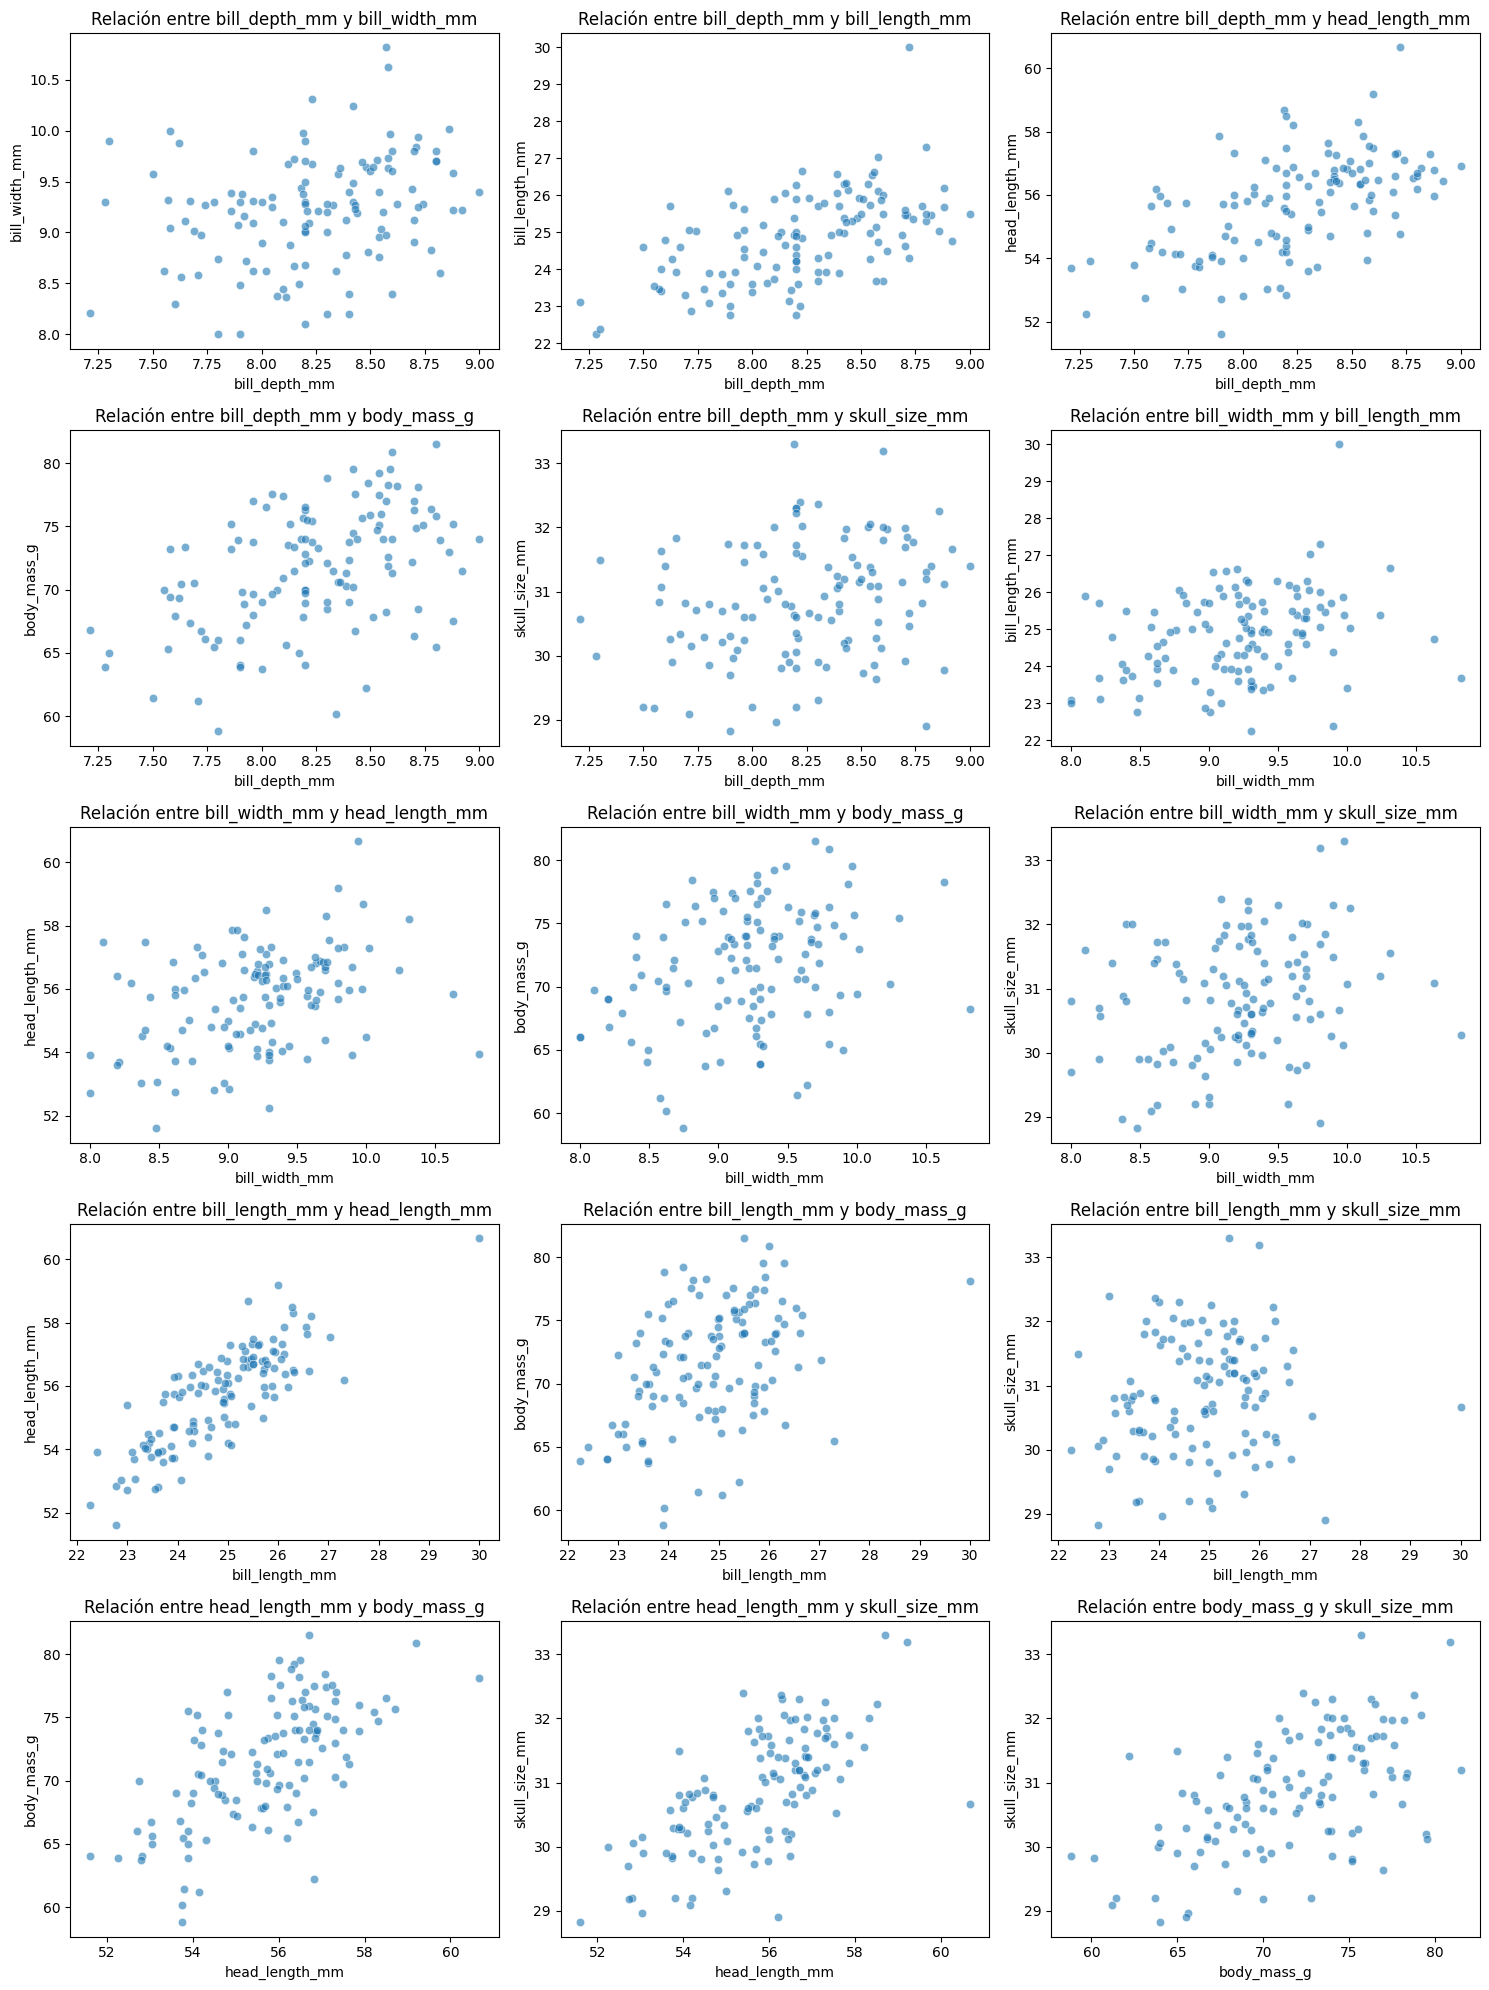

In [41]:
# Generar todas las combinaciones únicas de las variables
combinaciones_unicas = list(itertools.combinations(variables, 2))

# Calcular el número de gráficos a dibujar
num_graficos = len(combinaciones_unicas)
columnas = 3  # Número fijo de columnas para la visualización
filas = (num_graficos // columnas) + (num_graficos % columnas > 0)

# Crear la figura y los ejes para los gráficos
fig, ejes = plt.subplots(nrows=filas, ncols=columnas, figsize=(15, filas * 4))
ejes = ejes.flatten()  # Convertir a una lista unidimensional

# Generar los gráficos de dispersión para cada combinación de variables
for i, (x, y) in enumerate(combinaciones_unicas):
    sns.scatterplot(data=data_filtrada, x=x, y=y, alpha=0.6, ax=ejes[i])
    ejes[i].set_title(f"Relación entre {x} y {y}")
    ejes[i].set_xlabel(x)
    ejes[i].set_ylabel(y)

# Ocultar ejes vacíos si hay menos gráficos que espacios
for j in range(i + 1, len(ejes)):
    ejes[j].axis('off')

plt.tight_layout()
plt.show()

### **Interpretación de resultados del análisis bivariado**


1.   Se observa una correlación fuerte entre la longitud del pico y la longitud de la cabeza, así como entre la longitud del pico y la masa del cuerpo.

2.   Las relaciones entre las mediciones de ancho y profundidad del pico con otras variables tienden a mostrar más dispersión, sugiriendo poca o ninguna correlación evidente.

3. En varios gráficos, conforme aumenta el tamaño de una medida (por ejemplo, longitud del pico), otras mediciones relacionadas, como la longitud de la cabeza o la masa corporal, tienden a aumentar.





### **Estandarizar los datos filtrados**

In [42]:
# Estandarizar los datos filtrados
data_filtrada_estandarizada = (data_filtrada - data_filtrada.mean()) / data_filtrada.std()

### **Calcular la matriz de covarianza**

In [43]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(data_filtrada_estandarizada, rowvar=False)

### **Calcular valores y vectores propios**

In [44]:
# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Mostrar resultados de la matriz de covarianza, valores y vectores propios
print("Matriz de Covarianza:")
print(cov_matrix)
print("\nValores propios:")
print(eigenvalues)
print("\nVectores propios:")
print(eigenvectors)

Matriz de Covarianza:
[[1.         0.27011823 0.55218158 0.55770551 0.47285117 0.24669135]
 [0.27011823 1.         0.29647043 0.36176822 0.28974633 0.23905662]
 [0.55218158 0.29647043 1.         0.81482154 0.4098282  0.11262944]
 [0.55770551 0.36176822 0.81482154 1.         0.6294447  0.66779309]
 [0.47285117 0.28974633 0.4098282  0.6294447  1.         0.5528629 ]
 [0.24669135 0.23905662 0.11262944 0.66779309 0.5528629  1.        ]]

Valores propios:
[3.24625083e+00 1.00333255e+00 8.07170209e-01 5.42369011e-01
 4.00875612e-01 1.78965378e-06]

Vectores propios:
[[-3.96985691e-01 -3.42262537e-01  1.52675802e-01 -7.06649851e-01
  -4.50105291e-01  1.78260034e-04]
 [-2.81040838e-01 -4.49265410e-02 -9.58222042e-01 -2.83844499e-02
   1.56950604e-03  1.74613094e-04]
 [-4.20931181e-01 -5.44180448e-01  1.36291663e-01  4.39217464e-01
   1.41941341e-01  5.43184903e-01]
 [-5.23157620e-01  7.87571214e-03  1.40753884e-01  4.04039000e-01
  -1.31442872e-01 -7.25194925e-01]
 [-4.30888022e-01  2.77787878

### **Calcular la varianza explicada y acumulada**

In [45]:
# Calcular la varianza explicada por cada componente
varianza_explicada = eigenvalues / np.sum(eigenvalues)

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Determinar cuántos componentes son necesarios para el 90% de la varianza
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1

# Mostrar resultados
print("Varianza explicada por cada componente:")
print(varianza_explicada)
print("\nVarianza acumulada:")
print(varianza_acumulada)
print(f"\nNúmero de componentes necesarios para el 90% de la varianza: {n_componentes_90}")

Varianza explicada por cada componente:
[5.41041805e-01 1.67222092e-01 1.34528368e-01 9.03948351e-02
 6.68126020e-02 2.98275630e-07]

Varianza acumulada:
[0.5410418  0.7082639  0.84279226 0.9331871  0.9999997  1.        ]

Número de componentes necesarios para el 90% de la varianza: 4
